In [67]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np
from scipy.linalg import expm

n=150
m=[4,5,7,9,10]
phi_lst = []
phi_av = []
lg = []
time = np.arange(0,20,0.05)

for i in range(5):
    G = nx.barabasi_albert_graph(n, m[i], seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m[i], seed=None)
    
    degrees = 2*G.number_of_edges()
    phi_av.append(degrees/len(G.nodes()))
    

    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions
    D, V = LA.eigh(L)
    
    phi_t = []
    for t in time :                             #Loop through times and decay each initial component
        Ht = expm(np.multiply(L,-t))
        phi_t.append(Ht.sum())
        
    phi_lst.append(phi_t)
    lg.append('Ave'+str(phi_av[i]))
        

In [68]:
import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import numpy as np
from scipy.linalg import expm

nr=150
p=[0.033, 0.043, 0.05,0.067,0.089]
phi_lstr = []
phi_avr = []

time = np.arange(0,20,0.05)

for i in range(5):
    G = nx.gnp_random_graph(nr, p[i], seed=None, directed=False)
    while (nx.is_connected(G)==False):
        G = nx.gnp_random_graph(nr, p[i], seed=None, directed=False)

    degrees = 2*G.number_of_edges()
    phi_avr.append(degrees/len(G.nodes()))
    

    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions

    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix

    phi_tr = []
    for t in time :                             #Loop through times and decay each initial component
        #D = np.diag(np.exp(np.multiply(D,-t)));
        H = expm(np.multiply(L,-t))
        phi_tr.append(H.sum())
        
    phi_lstr.append(phi_tr)

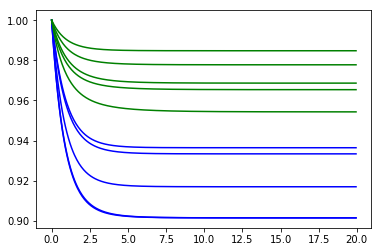

[7.786666666666667, 9.666666666666666, 13.346666666666666, 16.92, 18.666666666666668]
[4.906666666666666, 6.573333333333333, 7.746666666666667, 10.186666666666667, 13.093333333333334]


In [73]:
for i in range(5):
        plt.plot(time,[ e/max(phi_lst[i]) for e in phi_lst[i]],'-b')

for i in range(5):
        plt.plot(time,[ e/max(phi_lstr[i]) for e in phi_lstr[i]],'-g')
plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-ERheatcontent.eps', format='eps', dpi=1000)
plt.show()
print(phi_av)
print(phi_avr)

array([[0.33773308, 0.24542109, 0.28794601, 0.12889982],
       [0.24542109, 0.26373673, 0.24542109, 0.24542109],
       [0.28794601, 0.24542109, 0.33773308, 0.12889982],
       [0.12889982, 0.24542109, 0.12889982, 0.49677926]])

In [30]:
D,V = LA.eigh(A)
D

array([-7.21644973e-16,  1.00000000e+00,  3.00000000e+00,  4.00000000e+00])

In [31]:
D = np.diag(np.exp(-1*D))
H = np.dot(V,D)
Ht = np.dot(H,np.transpose(V))
Ht

array([[0.33773308, 0.24542109, 0.28794601, 0.12889982],
       [0.24542109, 0.26373673, 0.24542109, 0.24542109],
       [0.28794601, 0.24542109, 0.33773308, 0.12889982],
       [0.12889982, 0.24542109, 0.12889982, 0.49677926]])

In [10]:
V

array([-3.16227766+0.j,  3.16227766+0.j,  2.        +0.j])

In [11]:
np.diag(np.exp(D))

array([[6.8434571 , 0.        , 0.        ],
       [0.        , 1.51593548, 0.        ],
       [0.        , 0.        , 6.1432985 ]])

In [44]:
>>> G = nx.path_graph(4)  # or DiGraph, MultiGraph, MultiDiGraph, etc
>>> G.degree().values()

AttributeError: 'DegreeView' object has no attribute 'values'